[15 points] Load the dataset and appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.  
[15 points] Verify data quality: Explain any missing values or duplicate data. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).  


# LabOne-Exploring_Table_Data - Rupal Sanghavi, Omar Roa

This dataset contains information regarding crimes, excluding murders, in the City of Chicago. The attributes contained in the dataset can be grouped into a few categories. These categories are location (Block, Beat, District, Ward, Community Area, Latitude, Longitude, X Coordinate, Y Coordinate, Location, Community Area), Crime Properties (Primary Type, Description, Location Description, Domestic, Arrest), Organizational (IUCR, Case Number, FBI Code, Updated On, Year, Date, ID).

The data itself was provided by the Research & Development Division of the Chicago Police Department but was downloaded via 
https://www.kaggle.com/currie32/crimes-in-chicago This data is important as it could help potentially help in a few areas.

We have an abundance of location and date/time information. This alone can allow us to see patterns in where and when crime happened. Types of crime can also be useful. Awareness of types of crime per ward can help 

1) Help predict crime. Although crime prediction is still inaccurate, there have been new methods created such as PredPol (http://www.predpol.com/). It has not been completely successful (see https://mic.com/articles/156286/crime-prediction-tool-pred-pol-only-amplifies-racially-biased-policing-study-shows#.suYnLauXH ). If we can find meaningful relationships with our data, perhaps we can help predict summer crime in Chicago.

2) Demonstrate areas that may be in need of community involvement (or increase) . With our data, perhaps we can convince city hall to invest more into violence reduction programs (http://www.ncpc.org/topics/violent-crime-and-personal-safety/strategies/strategy-gang-prevention-through-community-intervention-with-high-risk-youth).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

df = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', sep=",")

df = df.drop(['Unnamed: 0', 'X Coordinate', 'Y Coordinate'], 1) #unsed columns
# df.dropna(inplace=True) potentially to drop empty vals

In [3]:
print(df.dtypes)
print('===========')
print(df.info())

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 20 columns):
ID                      1456714 non-null int64
Case Number             1456713 non-null object
Date                    1456714 non-null object
Block                   1456714 non-null object
IUCR                    1456714 non-null o

In [4]:
sum(df.Arrest==1)/len(df)*100.0

25.912567600778193

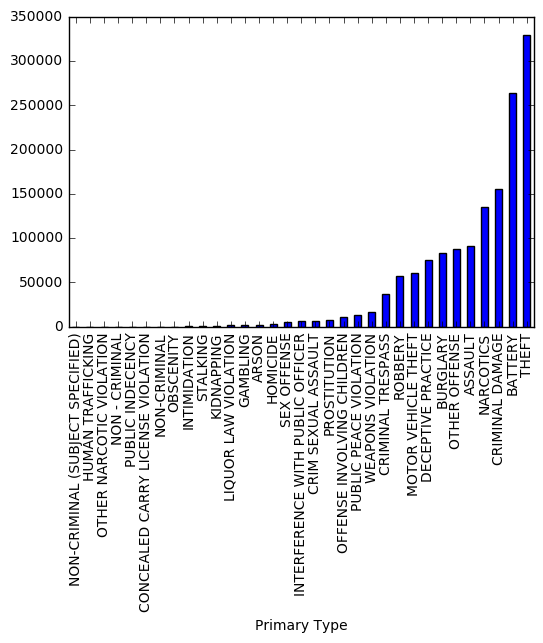

In [5]:
#for __ description, # of arrests
df_grouped = df.groupby(by="Primary Type")
arrests = df_grouped.Arrest.count()
# df["Primary Type"].describe()
# df.info()
arrests.sort_values(inplace=True)
ax = arrests.plot(kind = 'bar')

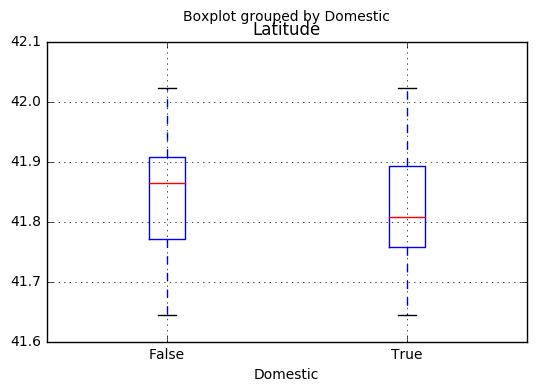

In [6]:
ax = df.boxplot(column='Latitude', by = 'Domestic') # group by class
ax.set_ybound(41.6,42.1)

count    1.456714e+06
mean     1.150644e+03
std      6.916466e+02
min      1.110000e+02
25%      6.130000e+02
50%      1.024000e+03
75%      1.711000e+03
max      2.535000e+03
Name: Beat, dtype: float64

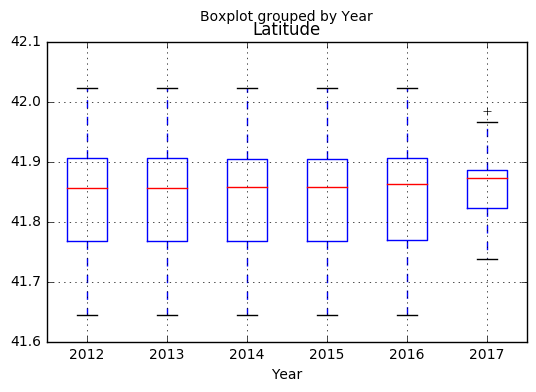

In [7]:
ax = df.boxplot(column='Latitude', by = 'Year') # group by class
ax.set_ybound(41.6,42.1)
df["Beat"].apply(str).describe()
df["Beat"].describe()



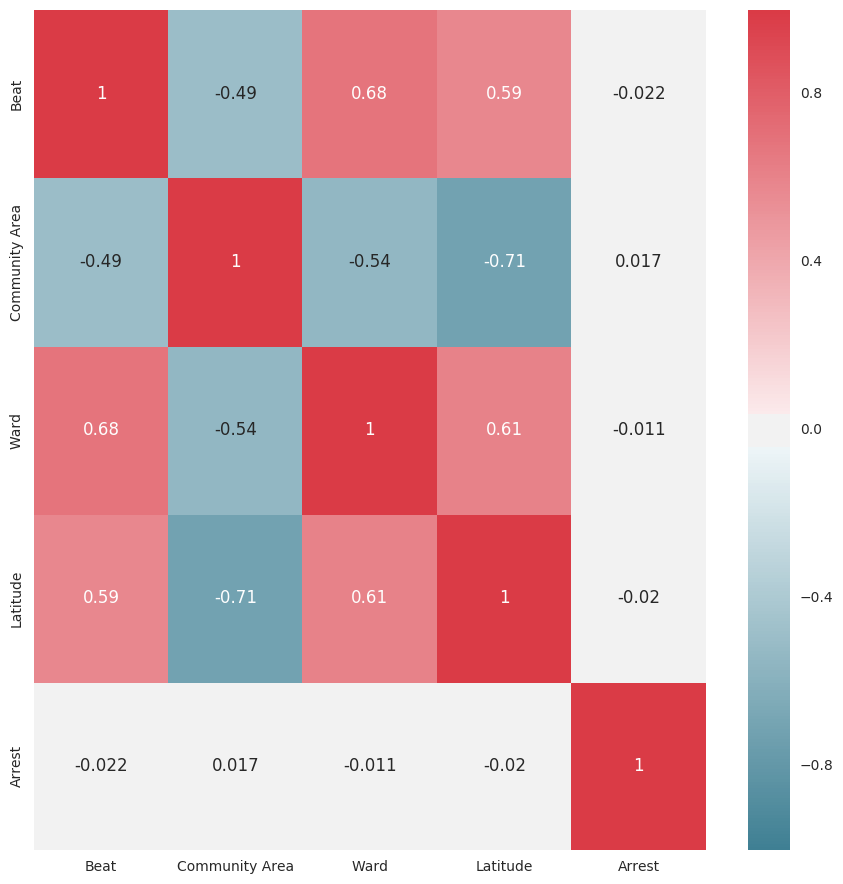

In [20]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
sns.set(style="darkgrid") 

f, ax = plt.subplots(figsize=(9, 9))
# df_grouped = df.groupby(by=['Primary Type'])
df_sub = df[['Beat','Community Area','Ward','Latitude','Arrest']]

sns.heatmap(df_sub.corr(), cmap=cmap, annot=True)
f.tight_layout()

In [8]:
df.Beat.describe()

count    1.456714e+06
mean     1.150644e+03
std      6.916466e+02
min      1.110000e+02
25%      6.130000e+02
50%      1.024000e+03
75%      1.711000e+03
max      2.535000e+03
Name: Beat, dtype: float64

count     33
unique    33
top       62
freq       1
Name: Arrest, dtype: object


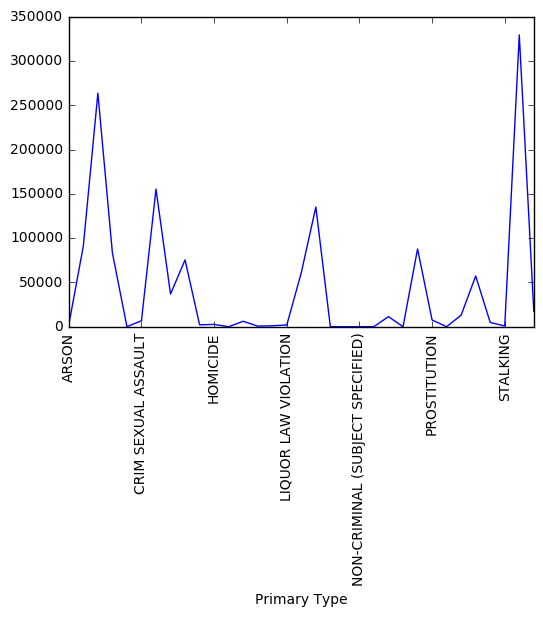

In [9]:
df_grouped = df.groupby(by="Primary Type")
arrests = df_grouped.Arrest.count()
print(arrests.apply(str).describe())

# df['counts']
# df['counts'] = Series(arrests, index=df1.index)
# df['counts']
# ax = sns.regplot(x="Latitude", y="counts", data=df)

# df1 = pd.DataFrame()
# df1['type'] = df['Primary Type']
# df1.join(arrests)
# plt.scatter(arrests.index, arrests)
arrests.plot(rot=90)
# result = df.sort(column = 0, ascending=True)


In [10]:
tokens = [x.split() for x in df['Date'].values ]
days = [x[0] for x in tokens]
datestokens = [x.split("/") for x in days]
day_in_month = [x[1] for x in datestokens]
month = [x[0] for x in datestokens]
year = [x[2] for x in datestokens]



# test = grouped.day_in_month.count()
# print(test.apply(str).describe())



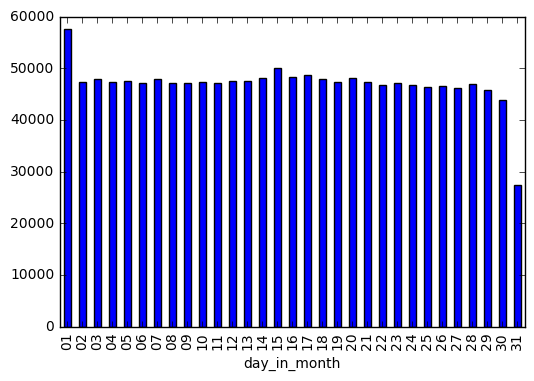

In [11]:
df['day_in_month'] = day_in_month
df['month'] = month
df['year'] = year
grouped = df.groupby(by="day_in_month")
blah = grouped.Arrest.count()
ax = blah.plot(kind = 'bar')

In [6]:
times = [x[1] for x in tokens]
df['times'] = times
grouped_time = df.groupby(by="times")
ax = grouped_time.plot(kind = 'line')
# times.sort()


NameError: name 'tokens' is not defined

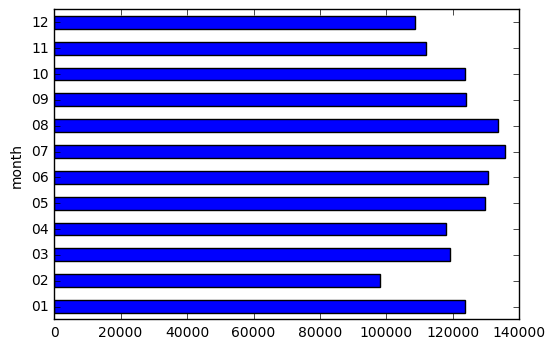

In [12]:
grouped = df.groupby(by="month")
month_arrests = grouped.Arrest.count()
ax = month_arrests.plot(kind = 'barh')


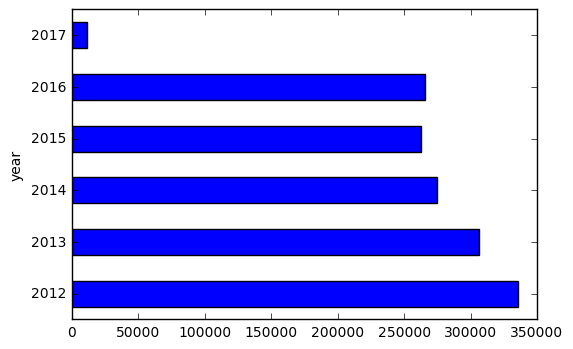

In [13]:
grouped = df.groupby(by="year")
year_arrests = grouped.Arrest.count()
ax = year_arrests.plot(kind = 'barh')

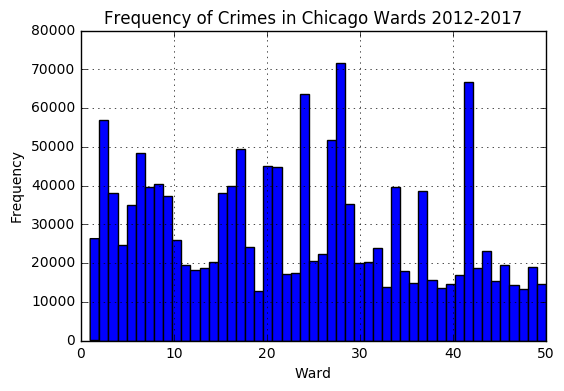

In [14]:
df['Ward'].hist(bins=50, grid=True)
plt.title("Frequency of Crimes in Chicago Wards 2012-2017")
plt.xlabel("Ward")
plt.ylabel("Frequency")